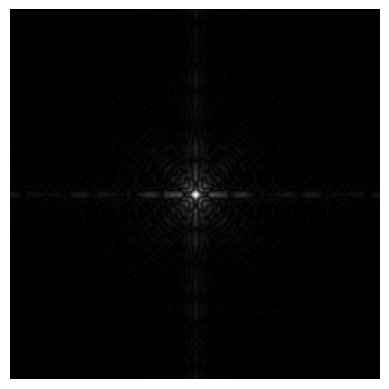

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('fourierspectrum.pgm')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## Power Law Transformation

In [12]:
def power_law_transformation (c, y, img):
  img_shape = img.shape
  length = img_shape[0]
  height = img_shape[1]

  # create new img to return
  new_img = np.zeros((length, height))

  # loop through every pixel 
  for row in range (length):
    for col in range(height):
      new_img[row][col] = c * (img[row][col] ** y)

  # Normalize the image to [0, 255] range and cast to uint8
  new_img = np.clip(new_img, 0, 255)
  
  return new_img.astype(np.uint8)


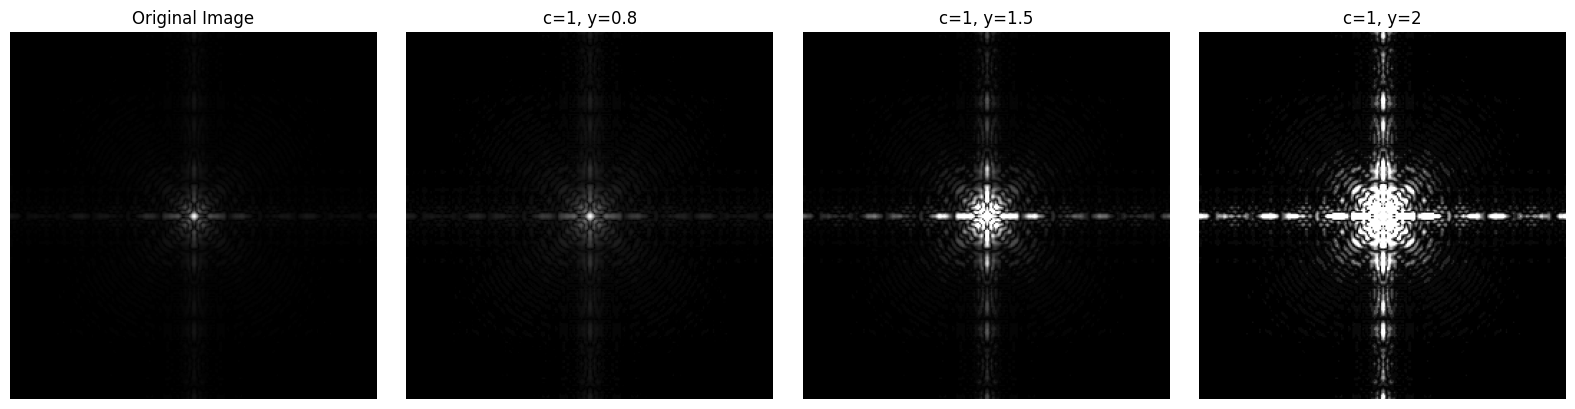

In [13]:
c_values = [1, 1, 1]
y_values = [0.8, 1.5, 2]

plt.figure(figsize=(16, 4))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Image')

# 3 different variations of power law transformation
for i in range(3):
    c = c_values[i]
    y = y_values[i]
    new_img = power_law_transformation(c, y, img)

    plt.subplot(1, 4, i+2)
    plt.imshow(new_img, cmap='gray')
    plt.axis('off')
    plt.title(f'c={c}, y={y}')

plt.tight_layout()
plt.show()

## Log Transformation

In [14]:
def log_transformation(c, img):
  img_shape = img.shape
  length = img_shape[0]
  height = img_shape[1]

  # create new img to return
  new_img = np.zeros((length, height))
  
  # loop through every pixel 
  for row in range (length):
    for col in range(height):
      new_img[row][col] = c * (np.log(1 + img[row][col]))

  # Normalize the image to [0, 255] range and cast to uint8
  new_img = np.clip(new_img, 0, 255)

  return new_img.astype(np.uint8)

  

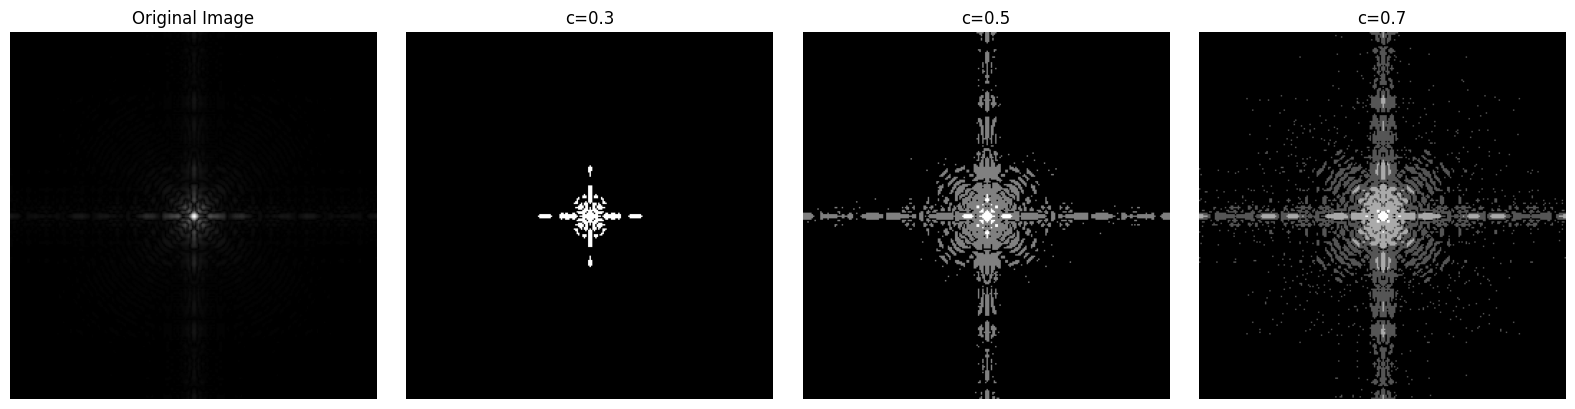

In [15]:
c_values = [0.3, 0.5, 0.7]

plt.figure(figsize=(16, 4))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Image')

# three diferent variations of log transformation
for i in range(3):
    c = c_values[i]
    new_img = log_transformation(c, img)

    plt.subplot(1, 4, i+2)
    plt.imshow(new_img, cmap='gray')
    plt.axis('off')
    plt.title(f'c={c}')

plt.tight_layout()
plt.show()

# Histogram Equilization

In [16]:
# create a normalized histogram 
def normalized_hist(img):
  # ensure that all images are unint8 values
  img = np.uint8(img)

  m, n = img.shape
  hist = np.zeros(256)

  # loop through every pixel and count how many pixel intensities exist
  for row in range(m):
    for col in range(n):
      hist[img[row,col]] += 1

  return np.array(hist/(m*n))

# histogram equalization function
def hist_equalization(img):
  hist = normalized_hist(img) # normalize the histogram
  cdf = np.cumsum(hist) # calculate the cumalitive sum
  transfer_img = np.uint8(255 * cdf) 
  # create the transfer image be multiplying the cumalitive sum by (L-1)
  # L = 256 since we are working with 8 bit gray level images

  m,n  = img.shape
  new_img = np.zeros((m,n))

  # apply the tranfer image to each pixel in the original image
  for row in range(m):
    for col in range(n):
      new_img[row,col] = transfer_img[img[row,col]]
  
  return new_img





## Initial Image

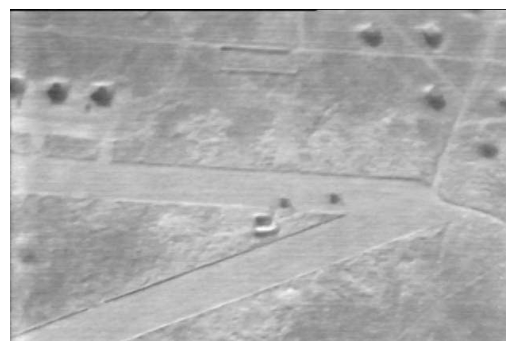

In [17]:
img = mpimg.imread('banker.jpeg')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

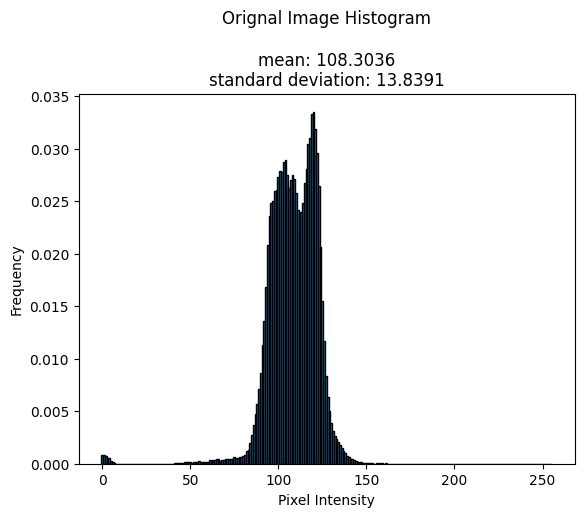

In [18]:
hist = normalized_hist(img)
intensity_levels = np.arange(len(hist))
mean = np.round(np.sum(hist * intensity_levels), 4)
std_dev = np.round(np.sqrt(np.sum(hist * (intensity_levels - mean) ** 2)), 4)

plt.bar(range(256), hist, width=1.0, edgecolor='black')
plt.title(f'Orignal Image Histogram\n\nmean: {mean}\nstandard deviation: {std_dev}')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

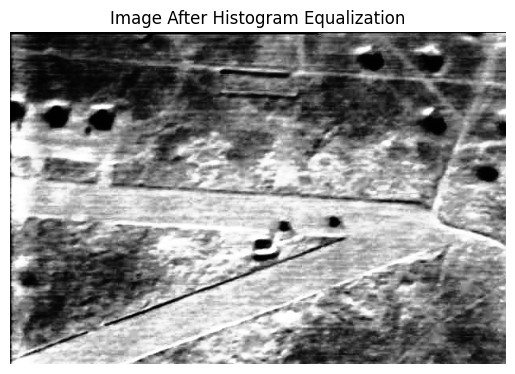

In [19]:
hist_equalization_img = hist_equalization(img)
plt.imshow(hist_equalization_img, cmap='gray')
plt.axis('off')
plt.title('Image After Histogram Equalization')
plt.show()


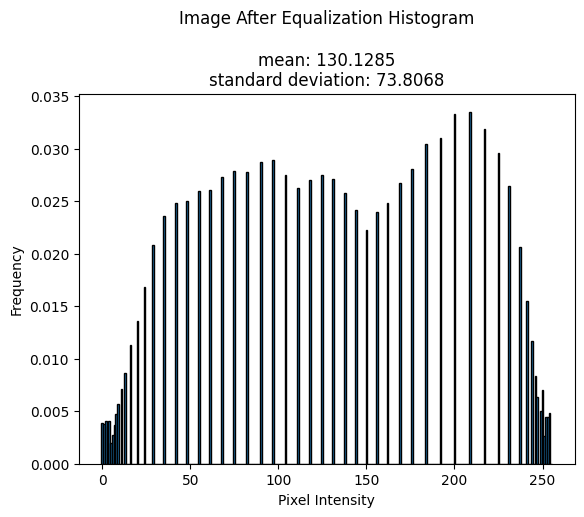

In [20]:
hist = normalized_hist(hist_equalization_img)

intensity_levels = np.arange(len(hist))
mean = np.round(np.sum(hist * intensity_levels), 4)
std_dev = np.round(np.sqrt(np.sum(hist * (intensity_levels - mean) ** 2)), 4)

plt.bar(range(256), hist, width=1.0, edgecolor='black')
plt.title(f'Image After Equalization Histogram\n\nmean: {mean}\nstandard deviation: {std_dev}')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()